# LQR finite and infite horizon

We have the following LTI dynamics
$$x_{t+1} = A\, x_t + B \,u_t  = \left[\begin{smallmatrix} 2 & 0.3 \\ 2 & 3 \end{smallmatrix}\right] x_t + \left[\begin{smallmatrix} 1 & 0.2 \\ 0.5 & 1 \end{smallmatrix}\right] u_t.$$

Solve the following optimal control problem (OPC)

\begin{array}{ll} \mbox{minimize} & \sum_{t=0}^{T-1} x_t^\top Q x_t +  \, u_t^\top R u_t + x_T^\top S x_T \\\mbox{subject to} & x_{t+1} = A\,x_t + B\,u_t\\ \end{array}

with $Q = \left[\begin{smallmatrix} 1 & 0 \\ 0 &  1\end{smallmatrix}\right]$ and $R = \left[\begin{smallmatrix} 1 & 0 \\ 0 & 1 \end{smallmatrix}\right]$.



Question 1:

Is the LTI system stable?

Answer 1:




In [28]:
import numpy as np

A = np.array([[2,0.3], [2,3]])



In [29]:
# Generate data for control problem.

#%%
n_x, n_u = 2,2

T = 3

B = np.array([[1, 0.2], [0.5, 1]])
Q = np.array([[1,0], [0,1]])
R = np.array([[1,0], [0,1]])
S = 10*Q

**Finite horizon LQR feedback**

We simualte the closed-loop system for a finite horizon $T=10$ under the LQR control law.

In [30]:
# Begin by computing and storing the optimal cost matrices
#
P_all =  [[] for t in range(T+1)]

#initialize P
P = S

for t in range(T+1):

    P_all[T-t] = P
    P = Q + np.transpose(A)@P@A-np.transpose(A)@P@B@np.linalg.inv(R+np.transpose(B)@P@B)@np.transpose(B)@P@A




In [31]:
#%% Simulate the system

#Initial condition
x0 = np.array([100,150])
x =  x0

#Initialize array to store trajectory
x_traj = np.zeros([T+1,n_x])
x_traj[0,:] = x

Gamma_t = [[] for t in range(T)]

for t in range(T):

    # Compute optimal feedback gain
    Gamma_t[t] = -np.linalg.inv(R+np.transpose(B)@P@B)@np.transpose(B)@P@A

    #Update state
    x = A@x + B@Gamma_t[t]@x
    x_traj[t+1,:] = x


**Infinite horizon LQR feedback: $T\to \infty$**



In [32]:
import scipy.linalg as la

#P_inf = Q + np.transpose(A)@P@A-np.transpose(A)@P@B@np.linalg.inv(R+np.transpose(B)@P@B)@np.transpose(B)@P@A



In [33]:
## Second option to compute P_inf
#pip install control
#import control as ctrl
from scipy.linalg import solve_continuous_are


P_inf = solve_continuous_are(A, B, Q, R)



In [37]:
#%% Simulate the system

#Initial condition
x0 = np.array([100,150])
x =  x0

#Initialize array to store trajectory
x_traj_inf = np.zeros([T+1,n_x])
x_traj_inf[0,:] = x

Gamma_inf =-np.linalg.inv(R+np.transpose(B)@P_inf@B)@np.transpose(B)@P_inf@A

for t in range(T):

    x = A@x+ B@Gamma_inf@x
    x_traj_inf[t+1,:] = x

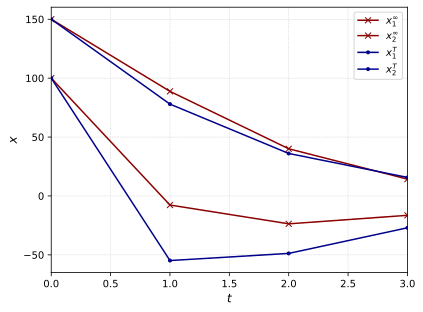

In [38]:
#%% Plotting
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(x_traj_inf, marker = 'x', color = 'darkred')
ax.plot(x_traj, marker = '.', color = 'darkblue')

ax.grid(which='both', axis='both',color='lightgrey', linestyle='--', linewidth=0.5)
ax.set_xlim([0,T])
ax.set_ylabel(r"$x$", fontsize=12)
ax.set_xlabel(r"$t$", fontsize=12)
ax.set_title('', fontsize=12)
ax.legend([r'$x_1^{\infty}$', r'$x_2^{\infty}$','$x_1^{T}$', '$x_2^{T}$' ]
              ,fontsize=10)


**Question 1:**

What happens for increasing horizon length as T$\to \infty$?

-->Plot the trajectories above for different horizon length and observe how the finite and infite horizon trajectories converge as you increase the horizon lentgh.

--> Explain why the system converges faster to the origin in one case than in the other.

In [39]:
#Print the matrices of P_inf and P_all for different horizon lengths to compare them

print(P_inf)

print(P_all[0])

[[ 4.24164519 -0.70173548]
 [-0.70173548  5.59549838]]
[[5.10300149 3.18888512]
 [3.18888512 8.41475967]]


**Question 2:**

Is the infinite horizon controller cost optimal even for the finite horizon problem?


-->Compute the total cost under the infitine and finite horzion control law

In [50]:
#%% Compute Optimal Cost

J_inf = 0
J_T = 0

for t in range(T):

    J_inf += np.transpose(x_traj_inf[t])@P_inf@x_traj_inf[t]
J_T += np.transpose(x_traj[t]) @ Q @ x_traj[t] + np.transpose(Gamma_t[t] @ x_traj[t]) @ R @ (Gamma_t[t] @ x_traj[t])

J_inf += 0
J_T += np.transpose(x_traj[T])@S@x_traj[T]

print('J_inf is: ' + str(J_inf))
print('J_T is: ' + str(J_T))

J_inf is: 205252.582924295
J_T is: 18452.202016752355


**Bonus question:**

Can you come up with ways to verify Bellman's principle of optimality for the inffinite and finite horizon problem using $P_{\infty}$ and $P_t$ ?

In [ ]:
OKKKK NICK